This image is:  <class 'numpy.ndarray'> with dimensions:  (540, 960, 3)


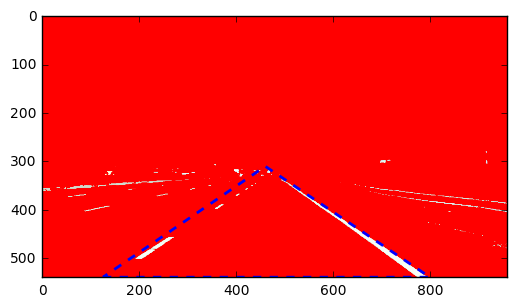

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

image = mpimg.imread('test.jpg')
print('This image is: ', type(image), 'with dimensions: ', image.shape);

ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

threshold = 200
red_threshold = threshold
green_threshold = threshold
blue_threshold = threshold

color_thresholds = (image[:,:,0] < red_threshold)   | \
                   (image[:,:,1] < green_threshold) | \
                   (image[:,:,2] < blue_threshold)

color_select[color_thresholds] = [0, 0, 0]

left_bottom = [125, 539]
right_bottom = [800, 539]
apex = [460, 310]

left_slope, left_intercept = np.polyfit((left_bottom[0], apex[0]), \
                                        (left_bottom[1], apex[1]), 1)
right_slope, right_intercept = np.polyfit((right_bottom[0], apex[0]), \
                                          (right_bottom[1], apex[1]), 1)
bottom_slope, bottom_intercept = np.polyfit((left_bottom[0], right_bottom[0]), \
                                            (left_bottom[1], right_bottom[1]), 1)

XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*left_slope + left_intercept)) & \
                    (YY > (XX*right_slope + right_intercept)) & \
                    (YY < (XX*bottom_slope + bottom_intercept))

line_image[color_thresholds] = [255, 0, 0]
# plt.figure();
# plt.imshow(color_select);
# plt.figure();
# plt.imshow(line_image);
# plt.figure();
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=2)
plt.imshow(line_image);

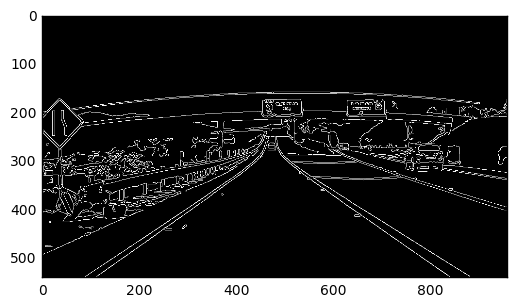

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

# Read in the image and convert to grayscale
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

kernel_size = 3
# Define a kernel size for Gaussian smoothing / blurring
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

# Define parameters for Canny and run it
# NOTE: if you try running this code you might want to change these!
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r');

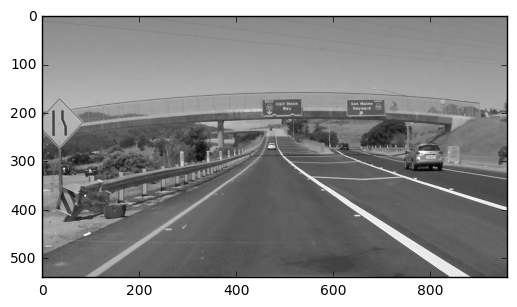

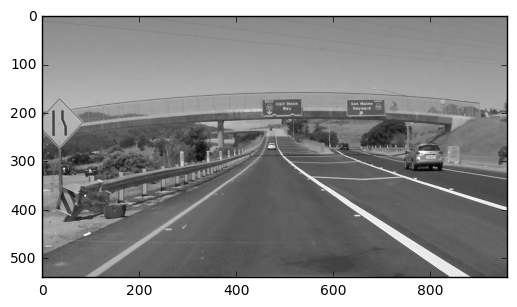

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

image1 = cv2.imread('exit-ramp.jpg')
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

image2 = mpimg.imread('exit-ramp.jpg')
gray2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)


plt.imshow(gray1, cmap='gray');
plt.figure()
plt.imshow(gray2, cmap='gray');

(540, 960, 3)


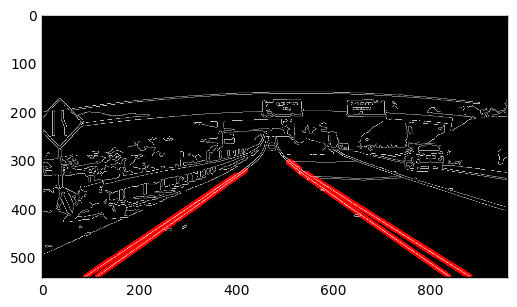

In [72]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

mask = np.zeros_like(edges)   
ignore_mask_color = 255  

imshape = image.shape

print(imshape)
vertices = np.array([[
            (50,imshape[0]),
            (450, 300), 
            (imshape[1]-450, 300), 
            (imshape[1]-50,imshape[0])]],
                    dtype=np.int32)

cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 20
max_line_gap = 5
line_image = np.copy(image)*0

lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)

color_edges = np.dstack((edges, edges, edges))

combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)

plt.imshow(combo);